In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt

Tiếp theo, tôi viết các hàm số :

`grad` để tính đạo hàm

`cost` để tính giá trị của hàm số. Hàm này không sử dụng trong thuật toán nhưng thường được dùng để kiểm tra việc tính đạo hàm của đúng không hoặc để xem giá trị của hàm số có giảm theo mỗi vòng lặp hay không.

`myGD1` là phần chính thực hiện thuật toán Gradient Desent nêu phía trên. Đầu vào của hàm số này là learning rate và điểm bắt đầu. Thuật toán dừng lại khi đạo hàm có độ lớn đủ nhỏ.

In [2]:
def grad(x):
    return 2*x+ 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

def myGD1(eta, x0):
    x = [x0]
    for it in range(100):
        #print(x[-1]);
        # x[-1] truy xuất vào phần tử cuối cùng 
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

In [3]:
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1,5) 

In [4]:
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, obtained after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, obtained after 29 iterations


In [6]:
X = np.random.rand(1000,1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

In [7]:
y

array([[4.32495178],
       [4.11332487],
       [6.56645084],
       [6.97897549],
       [6.48202235],
       [4.77937693],
       [6.42744439],
       [5.7257527 ],
       [6.88791348],
       [4.09196918],
       [6.73187179],
       [5.93019155],
       [5.33571828],
       [6.19926758],
       [6.45569799],
       [6.76558034],
       [6.6272603 ],
       [4.39429735],
       [4.80919696],
       [6.45650079],
       [6.70635289],
       [4.55412082],
       [6.84237946],
       [5.68856769],
       [4.96342354],
       [5.0836973 ],
       [6.30626479],
       [5.23588501],
       [6.1860685 ],
       [5.85268898],
       [4.44573637],
       [6.06304291],
       [6.05113003],
       [6.49252743],
       [6.88393673],
       [6.52129147],
       [6.54832302],
       [5.89025745],
       [5.37584626],
       [5.42210059],
       [6.13849424],
       [5.16798385],
       [6.2321135 ],
       [5.82462823],
       [4.34684136],
       [6.17731999],
       [5.93700829],
       [6.468

In [8]:
X


array([[0.15989608],
       [0.07247098],
       [0.84707793],
       [0.90402917],
       [0.79597286],
       [0.41407635],
       [0.75250366],
       [0.6996186 ],
       [0.89760694],
       [0.0274508 ],
       [0.86324173],
       [0.67314615],
       [0.41761941],
       [0.82162658],
       [0.82705229],
       [0.89845182],
       [0.8931782 ],
       [0.05162755],
       [0.32471802],
       [0.9160112 ],
       [0.86539335],
       [0.1736283 ],
       [0.9890728 ],
       [0.68700495],
       [0.31089249],
       [0.24823586],
       [0.74597159],
       [0.37409859],
       [0.74110454],
       [0.53780834],
       [0.2179061 ],
       [0.64793563],
       [0.63474574],
       [0.86228368],
       [0.92324848],
       [0.90328825],
       [0.89449019],
       [0.56243293],
       [0.58201841],
       [0.45079646],
       [0.6941528 ],
       [0.40988596],
       [0.72424435],
       [0.53486338],
       [0.17999746],
       [0.63597666],
       [0.72806823],
       [0.978

In [12]:
# Buidling bar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one,X),axis=1)

In [13]:
Xbar

array([[1.        , 0.15989608],
       [1.        , 0.07247098],
       [1.        , 0.84707793],
       ...,
       [1.        , 0.05984617],
       [1.        , 0.31503973],
       [1.        , 0.88832007]])

In [14]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)

In [15]:
w_lr = np.dot(np.linalg.pinv(A),b)

In [16]:

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0


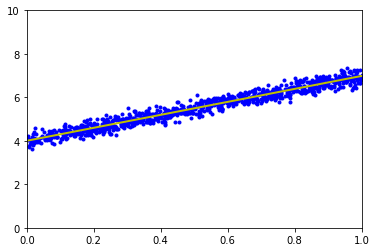

In [17]:
# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

In [18]:
Xbar.shape

(1000, 2)

In [19]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

In [20]:
def cost(w):
    N = Xbar.shape[0]
    return 0.5/N * np.linalg.norm(y-Xbar.dot(w),2)**2

***Giờ chúng ta phải check xem có đạo hàm hay không ? và có đúng không dựa vào công thức sau đây ***


In [21]:
w

array([[4.00322848],
       [2.98103001]])

In [22]:
np.random.rand(2, 1)

array([[0.88705657],
       [0.3041597 ]])

In [26]:
np.zeros_like(np.random.rand(2, 1))


array([[0.],
       [0.]])

In [31]:
def numberic_grad(w,cost):
    esp =1e-4
    g = np.zeros_like(w)
    for i in  range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += esp
        w_n[i] -= esp
        g[i] = (cost(w_p)-cost(w_n)) / (2*esp)
    return g
def check_grad(w,grad,cost):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numberic_grad(w,cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False

In [32]:
check_grad(np.random.rand(2,1),grad,cost)

True

In [36]:
def my_GD(w_init,grad,eta):
    """
    w_init: điểm bắt đầu của GD
    grad: hàm đã đạo hàm của hàm nhiều biến
    eta: learning rate
    """
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-6:
            break
        w.append(w_new)
    return (w,it)


In [37]:
w_init = np.array([[2], [1]])
(w1, it1) = my_GD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.00364938 2.98027146]] ,
after 100 iterations.


### Đường đồng mức

## Momentum

In [38]:
def has_coverged(theta_new,grad):
    print(theta_new,"This is the ta new")
    return np.linalg.norm(grad(theta_new)) / len(theta_new) < 1e-3
def GD_momentum(theta_init,grad,eta,gamma):
    """
    w_init: điểm bắt đầu , 
    grad: là đạo hàm của hàm
    eta: learning rate
    gamma: gammay cho v
    """
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] + v_new 
        if has_coverged(theta_new,grad):
            break
        theta.append(theta_new)
    return theta

In [ ]:
GD_momentum()